# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

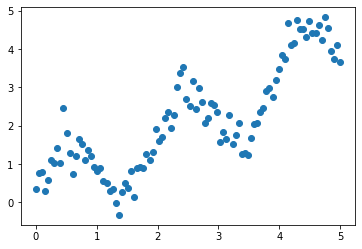

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5920484645703745


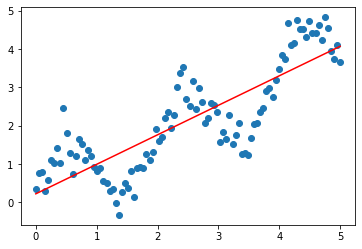

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

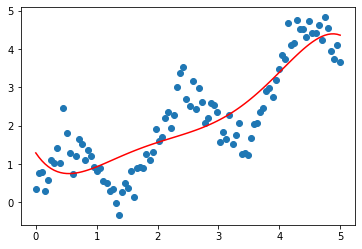

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.35718566  3.29973993 -1.640455    0.365097   -0.02904486]
interception:  1.2927216109112623


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.29272161, 1.18187971, 1.08663646, 1.00580796, 0.938265  ,
       0.88293196, 0.83878565, 0.80485416, 0.78021573, 0.76399757,
       0.75537477, 0.7535691 , 0.75784789, 0.7675229 , 0.78194913,
       0.80052372, 0.82268479, 0.84791029, 0.87571683, 0.90565859,
       0.93732615, 0.97034531, 1.00437599, 1.03911109, 1.07427528,
       1.10962394, 1.14494196, 1.18004259, 1.21476634, 1.24897979,
       1.28257448, 1.31546571, 1.34759148, 1.37891126, 1.4094049 ,
       1.43907145, 1.46792805, 1.49600875, 1.52336338, 1.55005642,
       1.57616582, 1.60178189, 1.62700611, 1.65195005, 1.67673417,
       1.70148669, 1.72634245, 1.75144176, 1.77692927, 1.80295279,
       1.82966218, 1.85720819, 1.8857413 , 1.91541062, 1.94636268,
       1.97874035, 2.01268164, 2.04831859, 2.08577613, 2.12517088,
       2.16661007, 2.21019036, 2.2559967 , 2.3041012 , 2.35456196,
       2.40742193, 2.46270778, 2.52042875, 2.5805755 , 2.64311894,
       2.70800914, 2.77517415, 2.84451884, 2.9159238 , 2.98924

In [15]:
regr_poly.predict(X_poly)

array([1.29272161, 1.18187971, 1.08663646, 1.00580796, 0.938265  ,
       0.88293196, 0.83878565, 0.80485416, 0.78021573, 0.76399757,
       0.75537477, 0.7535691 , 0.75784789, 0.7675229 , 0.78194913,
       0.80052372, 0.82268479, 0.84791029, 0.87571683, 0.90565859,
       0.93732615, 0.97034531, 1.00437599, 1.03911109, 1.07427528,
       1.10962394, 1.14494196, 1.18004259, 1.21476634, 1.24897979,
       1.28257448, 1.31546571, 1.34759148, 1.37891126, 1.4094049 ,
       1.43907145, 1.46792805, 1.49600875, 1.52336338, 1.55005642,
       1.57616582, 1.60178189, 1.62700611, 1.65195005, 1.67673417,
       1.70148669, 1.72634245, 1.75144176, 1.77692927, 1.80295279,
       1.82966218, 1.85720819, 1.8857413 , 1.91541062, 1.94636268,
       1.97874035, 2.01268164, 2.04831859, 2.08577613, 2.12517088,
       2.16661007, 2.21019036, 2.2559967 , 2.3041012 , 2.35456196,
       2.40742193, 2.46270778, 2.52042875, 2.5805755 , 2.64311894,
       2.70800914, 2.77517415, 2.84451884, 2.9159238 , 2.98924

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

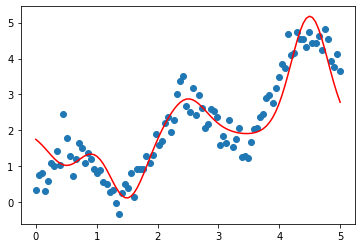

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.95588221 -1.87030056  0.89642873 -0.09102591  3.1900686 ]
interception:  1.989035795510634


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

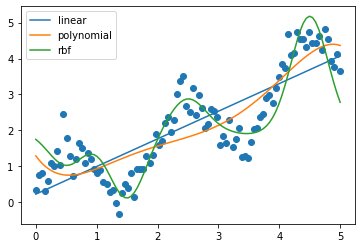

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5920484645703745


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4855226317487352


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2663267871535334
